In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"AirBnB_outlier_Treated.csv")
df

,ID,Host ID,Host Name,Host Since,Host Response Rate,Host Listings Count,Host Total Listings Count,City,State,Zipcode,...,PETS_FRIENDLY,FAMILY_FRIENDLY,PARKING_AVAILABLE,SECURE_ENTRY,LAUNDRY_AVAILABLE,FIRE_SAFETY_EQUIPPED,ACCESSIBLE,TEMPERATURE_CONTROL,KITCHEN_AVAILABLE,TV_AVAILABLE
0,6165738,31986651,Bernard,2015-04-26 00:00:00,100.00,1.0,1.0,Thoiry,Rhône-Alpes,1710,...,0,1,1,0,1,1,0,1,1,1
1,13908935,82489826,Enice,2016-07-08 00:00:00,100.00,1.0,1.0,Gaillard,Rhône-Alpes,74240,...,0,0,1,1,1,0,0,1,1,1
2,7713011,32492446,Vincent,2015-05-03 00:00:00,100.00,3.5,3.5,Paris,Ile-de-France,75018,...,0,1,0,0,0,1,0,1,1,1
3,3335054,2726446,Pascale,2012-06-24 00:00:00,97.50,1.0,1.0,Paris,Ile-de-France,75018,...,0,0,0,0,0,1,0,1,1,1
4,10066518,30432969,Lea,2015-04-01 00:00:00,95.00,2.0,2.0,Paris,Ile-de-France,75018,...,0,1,0,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57150,13537098,77859450,Yasemin,15-06-2016,100.00,1.0,1.0,Berlin,Berlin,10245.0,...,0,0,0,0,1,0,0,1,1,0
57151,18064664,14629591,Evelyn,23-04-2014,100.00,1.0,1.0,Berlin,Berlin,10247.0,...,0,0,1,0,1,0,0,1,1,1
57152,13457300,76897030,Ayse,10/6/2016,100.00,2.0,2.0,Berlin,Berlin,10179.0,...,0,1,1,0,1,0,0,1,1,1
57153,7535101,1148921,Tom,12/9/2011,100.00,3.0,3.0,Berlin,Berlin,10115.0,...,1,1,0,1,0,1,0,1,1,1


In [3]:
df.dtypes

ID                        int64
Host ID                   int64
Host Name                object
Host Since               object
Host Response Rate      float64
                         ...   
FIRE_SAFETY_EQUIPPED      int64
ACCESSIBLE                int64
TEMPERATURE_CONTROL       int64
KITCHEN_AVAILABLE         int64
TV_AVAILABLE              int64
Length: 81, dtype: object

In [4]:
columns_to_drop = [
    "ID", "Host ID", "Host Name", "Zipcode",
    "Host Listings Count", "Host Since", "UNKNOWN",
    "Reviews per Month","Weekly Price","Monthly Price",'Bathrooms','Bedrooms','Guests Included']


df = df.drop(columns_to_drop,axis = 1)

In [5]:
df.columns

Index(['Host Response Rate', 'Host Total Listings Count', 'City', 'State',
       'Country', 'Property Type', 'Room Type', 'Accommodates', 'Beds',
       'Bed Type', 'Amenities', 'Price', 'Security Deposit', 'Cleaning Fee',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Number of Reviews',
       'Review Scores Rating', 'Cancellation Policy', 'Host Experience',
       'Amenities Count', 'ACCESSIBLE-HEIGHT BED',
       'BABYSITTER RECOMMENDATIONS', 'BATHTUB', 'BED LINENS', 'BREAKFAST',
       'BUZZER/WIRELESS INTERCOM', 'CRIB', 'ELEVATOR IN BUILDING',
       'ESSENTIALS', 'EXTRA PILLOWS AND BLANKETS', 'FIREPLACE GUARDS', 'GYM',
       'HAIR DRYER', 'HANGERS', 'HOT TUB', 'INDOOR FIREPLACE', 'INTERNET',
       'IRON', 'LAPTOP FRIENDLY WORKSPACE', 'LOCK ON BEDROOM DOOR',
       'LUGGAGE DROPOFF ALLOWED', 'OUTLET COVERS',
       'PATH TO ENTRANCE LIT AT NIGHT', 'PATIO OR BALCONY', 'POOL',
       'PRIVATE ENTRANCE', 'PRIVATE LIVING ROOM', 'ROOM-DARKENING SHADES',
       'SAFETY 

In [6]:
categ_cols = ['INTERNET', 'PETS_FRIENDLY',
       'FAMILY_FRIENDLY', 'PARKING_AVAILABLE', 'SECURE_ENTRY',
       'LAUNDRY_AVAILABLE', 'FIRE_SAFETY_EQUIPPED', 'ACCESSIBLE',
       'TEMPERATURE_CONTROL', 'KITCHEN_AVAILABLE', 'TV_AVAILABLE']
for col in categ_cols:
    df[col] = df[col].astype('category')

In [7]:
numerical_cols = df.select_dtypes(include = "number")
categorical_cols = df.select_dtypes(exclude = "number")

In [8]:
numerical_cols.columns

Index(['Host Response Rate', 'Host Total Listings Count', 'Accommodates',
       'Beds', 'Price', 'Security Deposit', 'Cleaning Fee', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Number of Reviews',
       'Review Scores Rating', 'Host Experience', 'Amenities Count'],
      dtype='object')

In [9]:
categorical_cols.columns

Index(['City', 'State', 'Country', 'Property Type', 'Room Type', 'Bed Type',
       'Amenities', 'Cancellation Policy', 'ACCESSIBLE-HEIGHT BED',
       'BABYSITTER RECOMMENDATIONS', 'BATHTUB', 'BED LINENS', 'BREAKFAST',
       'BUZZER/WIRELESS INTERCOM', 'CRIB', 'ELEVATOR IN BUILDING',
       'ESSENTIALS', 'EXTRA PILLOWS AND BLANKETS', 'FIREPLACE GUARDS', 'GYM',
       'HAIR DRYER', 'HANGERS', 'HOT TUB', 'INDOOR FIREPLACE', 'INTERNET',
       'IRON', 'LAPTOP FRIENDLY WORKSPACE', 'LOCK ON BEDROOM DOOR',
       'LUGGAGE DROPOFF ALLOWED', 'OUTLET COVERS',
       'PATH TO ENTRANCE LIT AT NIGHT', 'PATIO OR BALCONY', 'POOL',
       'PRIVATE ENTRANCE', 'PRIVATE LIVING ROOM', 'ROOM-DARKENING SHADES',
       'SAFETY CARD', 'SELF CHECK-IN', 'SHAMPOO', 'SMOKING ALLOWED',
       'STAIR GATES', 'SUITABLE FOR EVENTS', 'WINDOW GUARDS',
       'WIRELESS INTERNET', 'PETS_FRIENDLY', 'FAMILY_FRIENDLY',
       'PARKING_AVAILABLE', 'SECURE_ENTRY', 'LAUNDRY_AVAILABLE',
       'FIRE_SAFETY_EQUIPPED', 'ACCESS

In [10]:
categorical_cols

,City,State,Country,Property Type,Room Type,Bed Type,Amenities,Cancellation Policy,ACCESSIBLE-HEIGHT BED,BABYSITTER RECOMMENDATIONS,...,PETS_FRIENDLY,FAMILY_FRIENDLY,PARKING_AVAILABLE,SECURE_ENTRY,LAUNDRY_AVAILABLE,FIRE_SAFETY_EQUIPPED,ACCESSIBLE,TEMPERATURE_CONTROL,KITCHEN_AVAILABLE,TV_AVAILABLE
0,Thoiry,Rhône-Alpes,France,Loft,Private room,Real Bed,"TV,WIRELESS INTERNET,AIR CONDITIONING,KITCHEN,...",flexible,False,False,...,0,1,1,0,1,1,0,1,1,1
1,Gaillard,Rhône-Alpes,France,Apartment,Entire home/apt,Pull-out Sofa,"TV,INTERNET,WIRELESS INTERNET,KITCHEN,FREE PAR...",moderate,False,False,...,0,0,1,1,1,0,0,1,1,1
2,Paris,Ile-de-France,France,Apartment,Entire home/apt,Real Bed,"TV,CABLE TV,INTERNET,WIRELESS INTERNET,KITCHEN...",strict,False,False,...,0,1,0,0,0,1,0,1,1,1
3,Paris,Ile-de-France,France,Apartment,Entire home/apt,Pull-out Sofa,"CABLE TV,WIRELESS INTERNET,KITCHEN,ELEVATOR IN...",moderate,False,False,...,0,0,0,0,0,1,0,1,1,1
4,Paris,Ile-de-France,France,Apartment,Entire home/apt,Real Bed,"INTERNET,WIRELESS INTERNET,KITCHEN,INDOOR FIRE...",moderate,False,False,...,0,1,0,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57150,Berlin,Berlin,Germany,Condominium,Private room,Real Bed,"WIRELESS INTERNET,KITCHEN,SMOKING ALLOWED,HEAT...",flexible,False,False,...,0,0,0,0,1,0,0,1,1,0
57151,Berlin,Berlin,Germany,Condominium,Private room,Real Bed,"TV,CABLE TV,WIRELESS INTERNET,KITCHEN,FREE PAR...",flexible,False,False,...,0,0,1,0,1,0,0,1,1,1
57152,Berlin,Berlin,Germany,Condominium,Entire home/apt,Real Bed,"TV,INTERNET,WIRELESS INTERNET,KITCHEN,FREE PAR...",moderate,False,False,...,0,1,1,0,1,0,0,1,1,1
57153,Berlin,Berlin,Germany,Condominium,Entire home/apt,Real Bed,"TV,CABLE TV,INTERNET,WIRELESS INTERNET,KITCHEN...",moderate,False,False,...,1,1,0,1,0,1,0,1,1,1


# Label Encoding

In [11]:
encoding = preprocessing.LabelEncoder()
for col in categorical_cols.columns:
    categorical_cols[col] = pd.DataFrame(encoding.fit_transform(df[col].to_numpy().reshape(-1,1)))

# Scaling

In [12]:
# Scaling the numerical data
myscaling = StandardScaler()
for col in numerical_cols.columns:
    numerical_cols[col] = pd.DataFrame(myscaling.fit_transform(df[col].to_numpy().reshape(-1,1)))
numerical_cols

,Host Response Rate,Host Total Listings Count,Accommodates,Beds,Price,Security Deposit,Cleaning Fee,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Review Scores Rating,Host Experience,Amenities Count
0,0.621597,-0.531780,-0.732480,-0.767645,-0.968956,-0.865253,-0.926958,-0.575372,-1.068519,0.754190,-0.795046,-1.651312,-0.556003,1.331711
1,0.621597,-0.531780,-0.732480,-0.767645,-1.084630,1.832646,0.288934,0.182892,-0.423178,-1.350807,-0.716733,0.297898,-1.359664,-0.026533
2,0.621597,2.403354,-0.732480,-0.767645,-0.136103,-0.383485,0.375784,0.056514,0.867504,-0.706813,2.102554,0.419723,-0.556003,-0.252907
3,0.298063,-0.531780,-0.732480,-0.767645,-0.483125,-0.142601,-0.275587,-0.575372,0.222163,0.754190,-0.716733,0.785200,1.386180,-1.158403
4,-0.025472,0.642273,-0.732480,-0.767645,-1.038361,-0.865253,-0.275587,-0.575372,-0.423178,0.754190,0.223029,0.712105,-0.489031,0.652589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57150,0.621597,-0.531780,-1.464884,-0.767645,-1.524192,0.098283,-0.926958,-0.575372,0.222163,-1.398867,-0.795046,0.616483,-1.359664,-1.158403
57151,0.621597,-0.531780,-0.732480,-0.767645,-1.061496,-0.865253,-0.926958,-0.575372,-1.068519,-1.381565,-0.481792,0.785200,-0.020228,-0.252907
57152,0.621597,0.642273,2.197134,2.396459,-0.645069,1.543585,-0.926958,-0.575372,2.158186,0.754190,0.927851,0.663374,-1.359664,0.199841
57153,0.621597,1.816327,-0.000077,0.497997,-1.154035,0.339166,1.200853,1.320287,0.222163,-1.235465,1.319419,0.468453,1.988926,-0.026533


In [13]:
final_df = pd.concat([numerical_cols, categorical_cols], axis=1)
final_df.shape

(57155, 68)

In [14]:
filtered_df = df[
    (df['WIRELESS INTERNET'] == 1) &
    (df['FAMILY_FRIENDLY'] == 1) &
    (df['PETS_FRIENDLY'] == 1) &
    (df['LAPTOP FRIENDLY WORKSPACE'] == 'Yes')
][['City']].drop_duplicates()

print(filtered_df)


Empty DataFrame
Columns: [City]
Index: []


# Corelation

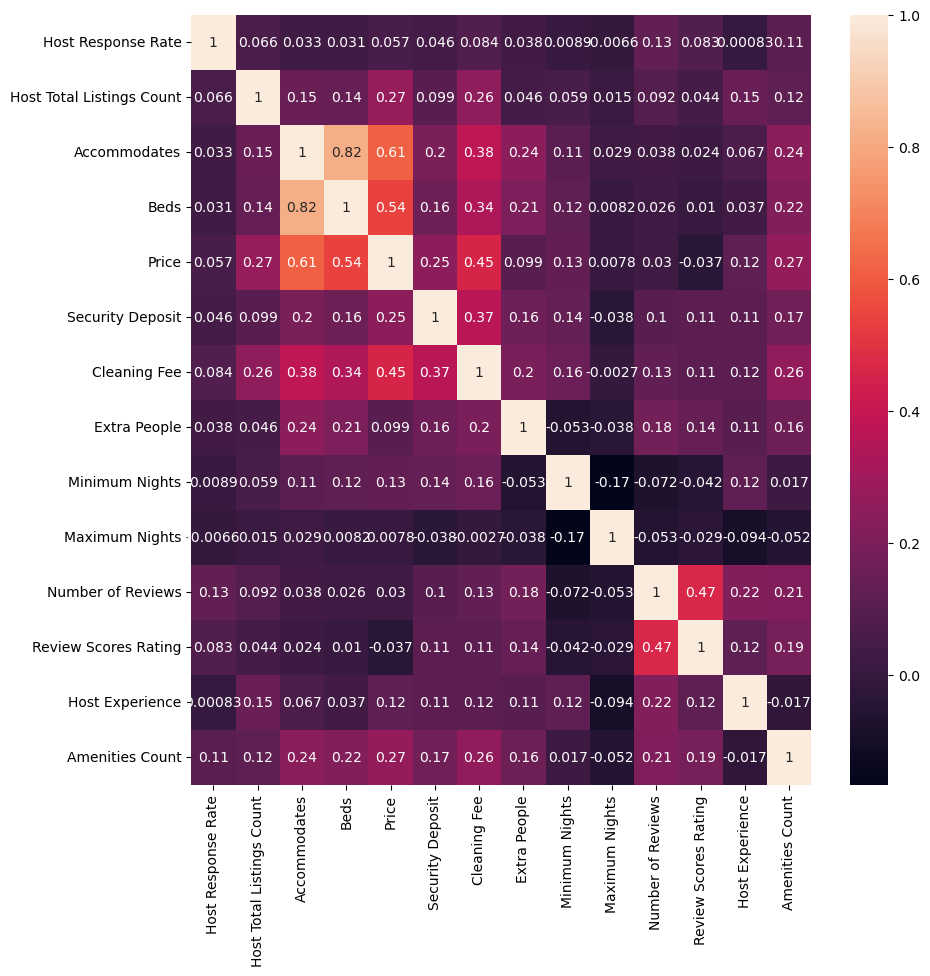

In [15]:
fig,ax =  plt.subplots(figsize=(10,10))
sns.heatmap(numerical_cols.corr(),annot = True)
plt.show()

# Checking VIF

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
def my_vif(x):
    vif = pd.Series(name = "vif")
    for i in range(0,no_of_cols):
        vif[x.columns[i]] = variance_inflation_factor(x.values,i)
    return vif

In [18]:
vif_df = numerical_cols.drop("Price",axis=1)

In [19]:
no_of_cols = vif_df.shape[1]

In [20]:
vif_values = my_vif(vif_df)
vif_values.sort_values(ascending=False)

Accommodates                 3.186879
Beds                         3.021760
Cleaning Fee                 1.422709
Number of Reviews            1.391942
Review Scores Rating         1.303835
Security Deposit             1.195057
Amenities Count              1.182861
Extra People                 1.138090
Host Experience              1.120644
Minimum Nights               1.108129
Host Total Listings Count    1.101674
Maximum Nights               1.047677
Host Response Rate           1.029528
Name: vif, dtype: float64

# Checking Correaltion based on Target Column

In [21]:
numerical_cols.corr()['Price'].sort_values()

Review Scores Rating        -0.036565
Maximum Nights               0.007764
Number of Reviews            0.029624
Host Response Rate           0.057483
Extra People                 0.099488
Host Experience              0.118174
Minimum Nights               0.133224
Security Deposit             0.245884
Amenities Count              0.267094
Host Total Listings Count    0.273995
Cleaning Fee                 0.453474
Beds                         0.541929
Accommodates                 0.608793
Price                        1.000000
Name: Price, dtype: float64

In [22]:
final_df.columns

Index(['Host Response Rate', 'Host Total Listings Count', 'Accommodates',
       'Beds', 'Price', 'Security Deposit', 'Cleaning Fee', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Number of Reviews',
       'Review Scores Rating', 'Host Experience', 'Amenities Count', 'City',
       'State', 'Country', 'Property Type', 'Room Type', 'Bed Type',
       'Amenities', 'Cancellation Policy', 'ACCESSIBLE-HEIGHT BED',
       'BABYSITTER RECOMMENDATIONS', 'BATHTUB', 'BED LINENS', 'BREAKFAST',
       'BUZZER/WIRELESS INTERCOM', 'CRIB', 'ELEVATOR IN BUILDING',
       'ESSENTIALS', 'EXTRA PILLOWS AND BLANKETS', 'FIREPLACE GUARDS', 'GYM',
       'HAIR DRYER', 'HANGERS', 'HOT TUB', 'INDOOR FIREPLACE', 'INTERNET',
       'IRON', 'LAPTOP FRIENDLY WORKSPACE', 'LOCK ON BEDROOM DOOR',
       'LUGGAGE DROPOFF ALLOWED', 'OUTLET COVERS',
       'PATH TO ENTRANCE LIT AT NIGHT', 'PATIO OR BALCONY', 'POOL',
       'PRIVATE ENTRANCE', 'PRIVATE LIVING ROOM', 'ROOM-DARKENING SHADES',
       'SAFETY 

In [23]:
numerical_cols.columns

Index(['Host Response Rate', 'Host Total Listings Count', 'Accommodates',
       'Beds', 'Price', 'Security Deposit', 'Cleaning Fee', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Number of Reviews',
       'Review Scores Rating', 'Host Experience', 'Amenities Count'],
      dtype='object')

In [24]:
important_categorical_columns = [
    'City',                 # Location is one of the strongest predictors
    'State',                # Regional pricing variation
    'Country',              # Different economies/currencies
    'Property Type',        # Apartment vs Villa vs Condo etc.
    'Room Type',            # Entire home vs Shared room impacts pricing
    'Bed Type',             # Can influence comfort level and price
    'Cancellation Policy',  # Flexible policies often have premium pricing
    'PETS_FRIENDLY',        # Pet-friendly homes attract niche and may be priced differently
    'FAMILY_FRIENDLY',      # Affects demand for families
    'PARKING_AVAILABLE',    # Adds value, especially in busy cities
    'KITCHEN_AVAILABLE',    # Important for longer stays
    'TV_AVAILABLE',         # Basic amenity expectation
    'WIRELESS INTERNET',    # Essential for most guests
    'TEMPERATURE_CONTROL',  # Affects comfort in different climates
    'SECURE_ENTRY'          # Security influences value perception
]

In [25]:
categorical_cols.columns

Index(['City', 'State', 'Country', 'Property Type', 'Room Type', 'Bed Type',
       'Amenities', 'Cancellation Policy', 'ACCESSIBLE-HEIGHT BED',
       'BABYSITTER RECOMMENDATIONS', 'BATHTUB', 'BED LINENS', 'BREAKFAST',
       'BUZZER/WIRELESS INTERCOM', 'CRIB', 'ELEVATOR IN BUILDING',
       'ESSENTIALS', 'EXTRA PILLOWS AND BLANKETS', 'FIREPLACE GUARDS', 'GYM',
       'HAIR DRYER', 'HANGERS', 'HOT TUB', 'INDOOR FIREPLACE', 'INTERNET',
       'IRON', 'LAPTOP FRIENDLY WORKSPACE', 'LOCK ON BEDROOM DOOR',
       'LUGGAGE DROPOFF ALLOWED', 'OUTLET COVERS',
       'PATH TO ENTRANCE LIT AT NIGHT', 'PATIO OR BALCONY', 'POOL',
       'PRIVATE ENTRANCE', 'PRIVATE LIVING ROOM', 'ROOM-DARKENING SHADES',
       'SAFETY CARD', 'SELF CHECK-IN', 'SHAMPOO', 'SMOKING ALLOWED',
       'STAIR GATES', 'SUITABLE FOR EVENTS', 'WINDOW GUARDS',
       'WIRELESS INTERNET', 'PETS_FRIENDLY', 'FAMILY_FRIENDLY',
       'PARKING_AVAILABLE', 'SECURE_ENTRY', 'LAUNDRY_AVAILABLE',
       'FIRE_SAFETY_EQUIPPED', 'ACCESS

In [26]:
x=final_df[['Accommodates', 'Cleaning Fee','Room Type','TV_AVAILABLE','Host Total Listings Count','Extra People','Review Scores Rating', 'Amenities Count',
           'Room Type', 'Cancellation Policy', 'FAMILY_FRIENDLY', 'TV_AVAILABLE','Property Type', 'Bed Type','Country','KITCHEN_AVAILABLE',
           'Security Deposit','Host Experience','Host Response Rate','Beds','Minimum Nights', 'Number of Reviews','PETS_FRIENDLY', 'WIRELESS INTERNET',
            'TEMPERATURE_CONTROL','City','TEMPERATURE_CONTROL', 'SECURE_ENTRY']].to_numpy().reshape(-1,28)

In [27]:
y = final_df['Price'].to_numpy().reshape(-1,1)

In [28]:
# splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(40008, 28)
(17147, 28)
(40008, 1)
(17147, 1)


In [29]:
linear_model = LinearRegression()
Simple_linear = linear_model.fit(x_train, y_train)
r_sq_train = Simple_linear.score(x_train, y_train)
y_pred = Simple_linear.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r_sq_testing = Simple_linear.score(x_test, y_test)

print("R2_Square Training model performance:", r_sq_train)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2_Square Testing model performance:", r_sq_testing)

R2_Square Training model performance: 0.5094855255609352
MSE: 0.488780598138357
RMSE: 0.6991284561068567
MAE: 0.5347630462721615
R2_Square Testing model performance: 0.5158029938288619


In [30]:
print("INTERCEPT:", linear_model.intercept_)
print("COEFFICIENT:", linear_model.coef_)

INTERCEPT: [-0.11567574]
COEFFICIENT: [[ 0.35027176  0.16840002 -0.14749319  0.1147714   0.11858735 -0.06768135
  -0.0855576   0.12375495 -0.14749319  0.02662397 -0.0653524   0.1147714
   0.0134977   0.10365879 -0.3514047  -0.34611467  0.03793409  0.05859835
   0.00654571  0.12836905 -0.00378102 -0.01254381 -0.13256779 -0.00713328
  -0.04074523  0.00096088 -0.04074523 -0.06545182]]


<Axes: ylabel='residual'>

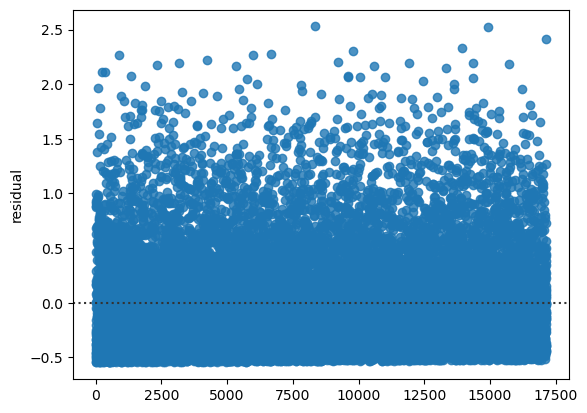

In [31]:
df_res = pd.DataFrame()
df_res["y_predicted"] = pd.DataFrame(y_pred)
df_res["y_actual"] = pd.DataFrame(y_test)
df_res["residual"] = abs(df_res["y_predicted"] - df_res["y_actual"])
sns.residplot(x = df_res.index,y = "residual",data = df_res)

<Axes: xlabel='residual', ylabel='Count'>

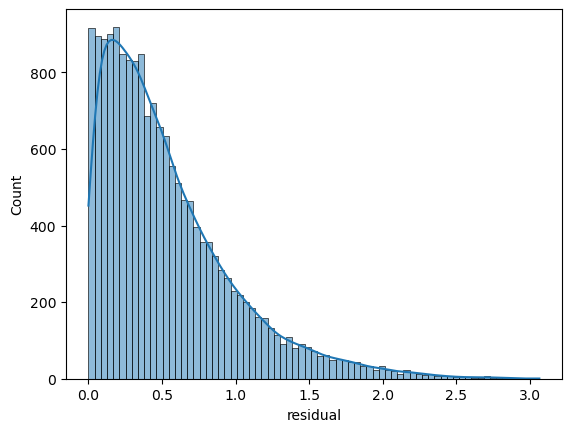

In [32]:
sns.histplot(df_res["residual"],kde = True )

# K Means

In [33]:
x= np.array(final_df["Price"]).reshape(-1,1)

In [34]:
n = int(len(x)**0.5)
n

239

In [35]:
# finding optimum clusters
err = []
mycluster = np.arange(2,10)
for k in mycluster:
  temp = KMeans(n_clusters = k)
  temp.fit(x)
  err.append(temp.inertia_)

In [36]:
err

[15452.722749997403,
 6658.061789931222,
 3903.6181812923637,
 2918.195055570285,
 1710.9781242982963,
 1051.0126033731844,
 833.2077545193047,
 625.8075817920205]

Text(0, 0.5, 'value received from .inertia_')

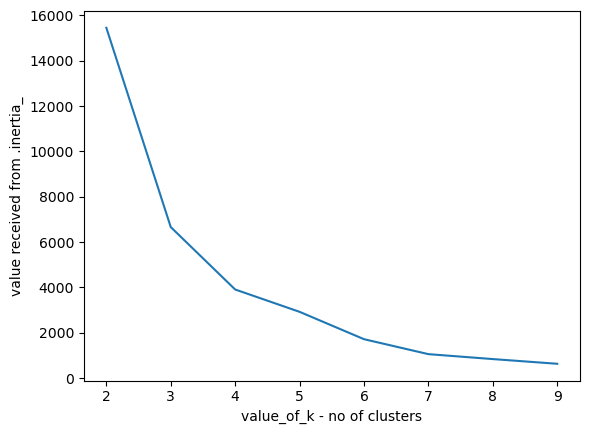

In [37]:
# plotting Elbow curve to find the optimum 'K'
plt.plot(mycluster,err)
plt.xlabel("value_of_k - no of clusters")
plt.ylabel("value received from .inertia_")

In [38]:
# checking the performance for Different 'k' value
for j in mycluster:
  temp_model = KMeans(n_clusters=j,random_state=0)
  cluster_labels = temp_model.fit_predict(x)
  silhouette_avg = silhouette_score(x,cluster_labels)*100
  print("for clusters  = ",j,"silhouette is", silhouette_avg)
  print("for clusters  = ",j,"davies_bouldin_score is", davies_bouldin_score(x,temp_model.labels_))
  print("for clusters  = ",j,"calinski_harabasz_score is", calinski_harabasz_score(x,temp_model.labels_))
  print()

for clusters  =  2 silhouette is 67.89572481187133
for clusters  =  2 davies_bouldin_score is 0.4614753866890564
for clusters  =  2 calinski_harabasz_score is 154238.8542284452

for clusters  =  3 silhouette is 58.057412565045595
for clusters  =  3 davies_bouldin_score is 0.5138849944698883
for clusters  =  3 calinski_harabasz_score is 210070.55565058114

for clusters  =  4 silhouette is 59.41842372073943
for clusters  =  4 davies_bouldin_score is 0.4824330029567522
for clusters  =  4 calinski_harabasz_score is 261838.4088467647

for clusters  =  5 silhouette is 56.320762374102664
for clusters  =  5 davies_bouldin_score is 0.4819569827181237
for clusters  =  5 calinski_harabasz_score is 314590.419006327

for clusters  =  6 silhouette is 57.247955093954296
for clusters  =  6 davies_bouldin_score is 0.46171370303878256
for clusters  =  6 calinski_harabasz_score is 365228.53595857543

for clusters  =  7 silhouette is 60.256401636997616
for clusters  =  7 davies_bouldin_score is 0.46356655

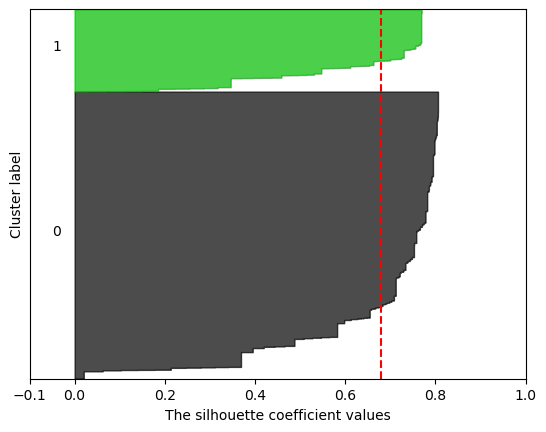

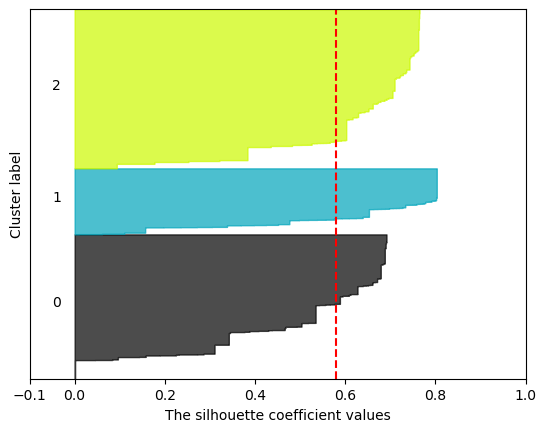

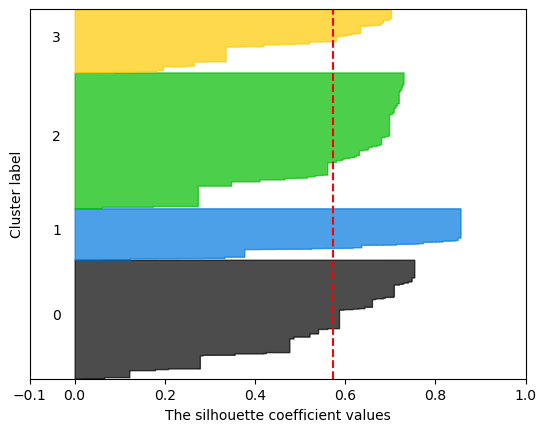

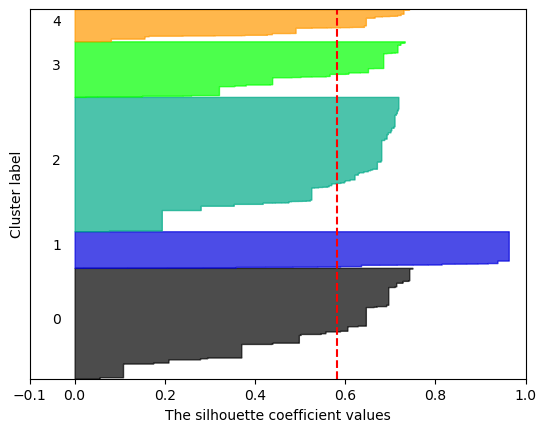

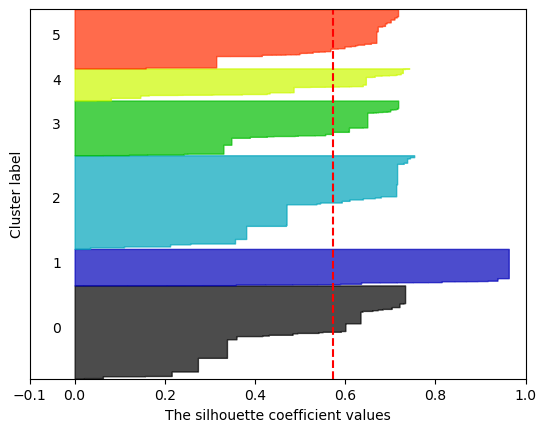

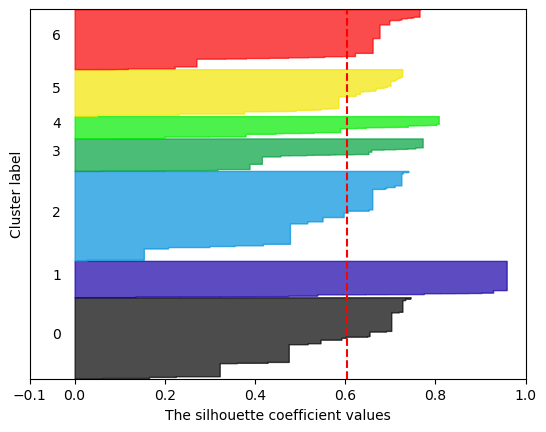

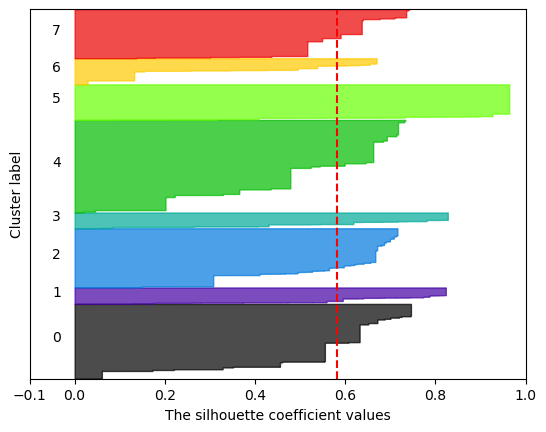

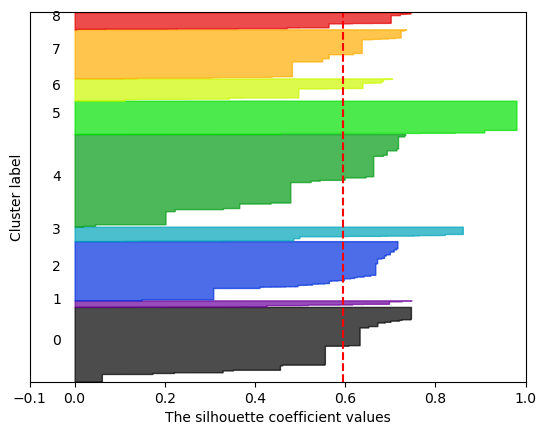

In [39]:
range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    sil_avg = silhouette_score(x,cluster_labels)
    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # axline line is used for threshold
    # axvline kine is used as vertical treshold
plt.show()

In [40]:
# creating a KMeans model with 3 as no. of clusters
final_km = KMeans(n_clusters=3,random_state=0)
final_km.fit(x)
final_centroid = final_km.cluster_centers_
final_labels = final_km.labels_ # Final model
clusters = final_km.fit_predict(x)
df['clusters'] = clusters
final_df['clusters'] = clusters
label_map = {
    0: 'Moderate Price',
    1: 'High Price',
    2: 'Less Price'
    }
df["cluster_label"] = df["clusters"].map(label_map)
final_df["cluster_label"] = final_df["clusters"].map(label_map)

In [41]:
j = 3
print("for clusters  = ",j,"silhouette is",round(silhouette_score(x,final_km.labels_),2) )
print("for clusters  = ",j,"davies_bouldin_score is", davies_bouldin_score(x,final_km.labels_))
print("for clusters  = ",j,"calinski_harabasz_score is", calinski_harabasz_score(x,final_km.labels_))


for clusters  =  3 silhouette is 0.58
for clusters  =  3 davies_bouldin_score is 0.5138849944698883
for clusters  =  3 calinski_harabasz_score is 210070.55565058114


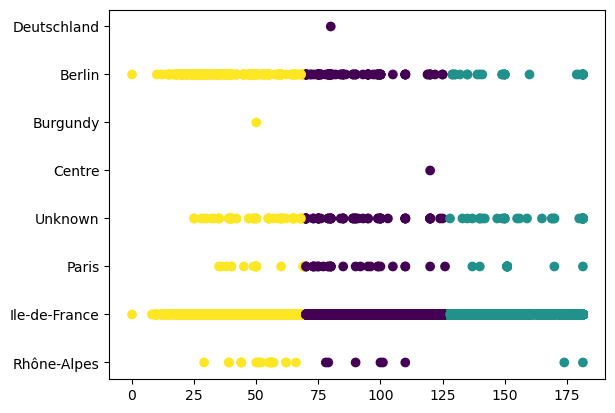

In [42]:
plt.scatter(df['Price'],df['State'],c = final_km.labels_)

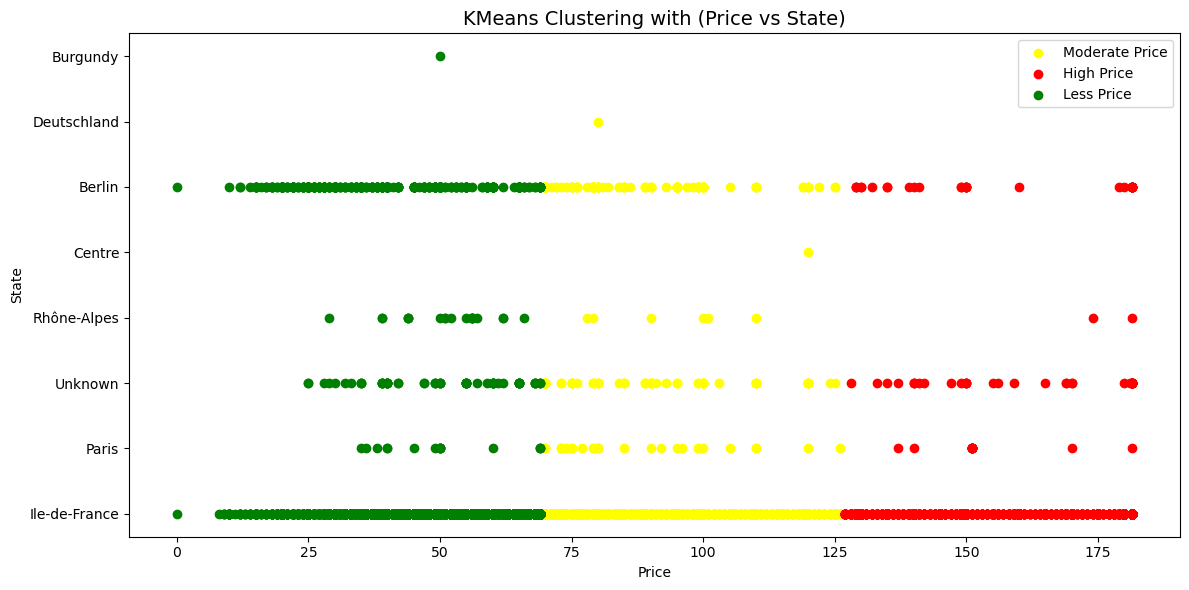

In [43]:
# Define your segments and colors
segments = ['Moderate Price','High Price','Less Price']
mycolors = ["Yellow","Red","Green"]

# Create the plot
plt.figure(figsize=(12, 6))  # Adjust the figure size for better readability

# Ensure `k` matches the number of clusters (should be 2 here)
for i in range(len(segments)):
    plt.scatter(
        df.loc[final_df.clusters == i, 'Price'],
        df.loc[final_df.clusters == i, 'State'],
        c=mycolors[i],
        label=segments[i]
    )

# Add labels and formatting
plt.title('KMeans Clustering with (Price vs State)', fontsize=14)
plt.xlabel('Price')
plt.ylabel('State')
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

In [44]:
df.columns

Index(['Host Response Rate', 'Host Total Listings Count', 'City', 'State',
       'Country', 'Property Type', 'Room Type', 'Accommodates', 'Beds',
       'Bed Type', 'Amenities', 'Price', 'Security Deposit', 'Cleaning Fee',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Number of Reviews',
       'Review Scores Rating', 'Cancellation Policy', 'Host Experience',
       'Amenities Count', 'ACCESSIBLE-HEIGHT BED',
       'BABYSITTER RECOMMENDATIONS', 'BATHTUB', 'BED LINENS', 'BREAKFAST',
       'BUZZER/WIRELESS INTERCOM', 'CRIB', 'ELEVATOR IN BUILDING',
       'ESSENTIALS', 'EXTRA PILLOWS AND BLANKETS', 'FIREPLACE GUARDS', 'GYM',
       'HAIR DRYER', 'HANGERS', 'HOT TUB', 'INDOOR FIREPLACE', 'INTERNET',
       'IRON', 'LAPTOP FRIENDLY WORKSPACE', 'LOCK ON BEDROOM DOOR',
       'LUGGAGE DROPOFF ALLOWED', 'OUTLET COVERS',
       'PATH TO ENTRANCE LIT AT NIGHT', 'PATIO OR BALCONY', 'POOL',
       'PRIVATE ENTRANCE', 'PRIVATE LIVING ROOM', 'ROOM-DARKENING SHADES',
       'SAFETY 

# Logistic Regression

In [45]:
selected_cols = ['Accommodates',   'Beds', 'Amenities Count','Price',
    'Property Type', 'Room Type', 'Bed Type',  'TV_AVAILABLE','KITCHEN_AVAILABLE',]

x_lg = final_df[selected_cols]
y_lg = final_df['FAMILY_FRIENDLY']

In [46]:
# creating Logistic Regression model
x_train_lg,x_test_lg,y_train_lg,y_test_lg = train_test_split(x_lg,y_lg,train_size = 0.7,random_state = 42)
model_lg = LogisticRegression().fit(x_train_lg,y_train_lg)
model_score = model_lg.score(x_train_lg,y_train_lg)
y_pred_lg = model_lg.predict(x_test_lg)
acc_score = accuracy_score(y_test_lg,y_pred_lg)
conf_mat = confusion_matrix(y_test_lg,y_pred_lg)
cl_report = classification_report(y_test_lg,y_pred_lg)
f1 = f1_score(y_test_lg,y_pred_lg,average="weighted")

print(f"Training Model Performance:{model_score:.2f}")
print(f"\nAccuracy Score : {acc_score:.2f}")
print(f"\nConfusion Matrix : \n{conf_mat}")
print(f"\nClassification Report: \n{cl_report}")
print(f"\nF1 Score : {f1:.2f}")


Training Model Performance:0.73

Accuracy Score : 0.72

Confusion Matrix : 
[[5515 2118]
 [2598 6916]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.68      0.72      0.70      7633
           1       0.77      0.73      0.75      9514

    accuracy                           0.72     17147
   macro avg       0.72      0.72      0.72     17147
weighted avg       0.73      0.72      0.73     17147


F1 Score : 0.73


In [47]:
y_probas = model_lg.predict_proba(x_test_lg)


In [48]:
roc_auc_score(y_test_lg,model_lg.predict_proba(x_test_lg)[:,1])

0.800045371572232

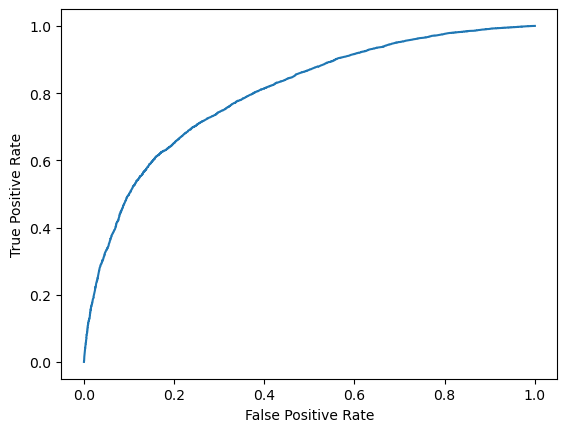

In [49]:
fpr,tpr,threshold = metrics.roc_curve(y_test_lg,model_lg.predict_proba(x_test_lg)[:,1],pos_label=1)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [50]:
ns_probs = [0 for _ in range(len(y_test_lg))]

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.800


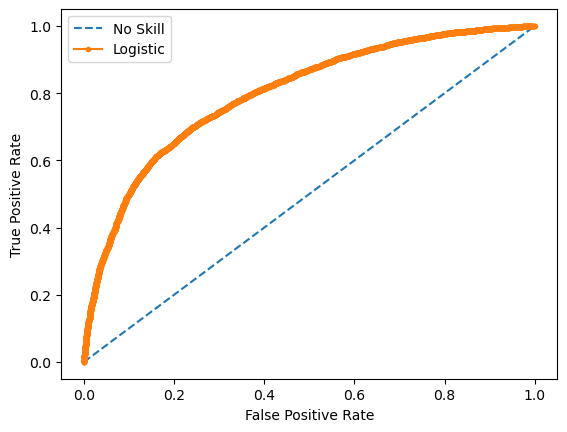

In [51]:
lr_probs = y_probas[:, 1]

# calculate scores

ns_auc = roc_auc_score(y_test_lg, ns_probs)

lr_auc = roc_auc_score(y_test_lg, lr_probs)

# summarize scores

print('No Skill: ROC AUC=%.3f' % (ns_auc))

print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves

ns_fpr, ns_tpr, _ = roc_curve(y_test_lg, ns_probs)

lr_fpr, lr_tpr, _ = roc_curve(y_test_lg, lr_probs)

# plot the roc curve for the model

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

# show the legend

plt.legend()

# show the plot

plt.show()

In [52]:
df

,Host Response Rate,Host Total Listings Count,City,State,Country,Property Type,Room Type,Accommodates,Beds,Bed Type,...,PARKING_AVAILABLE,SECURE_ENTRY,LAUNDRY_AVAILABLE,FIRE_SAFETY_EQUIPPED,ACCESSIBLE,TEMPERATURE_CONTROL,KITCHEN_AVAILABLE,TV_AVAILABLE,clusters,cluster_label
0,100.00,1.0,Thoiry,Rhône-Alpes,France,Loft,Private room,2,1.0,Real Bed,...,1,0,1,1,0,1,1,1,2,Less Price
1,100.00,1.0,Gaillard,Rhône-Alpes,France,Apartment,Entire home/apt,2,1.0,Pull-out Sofa,...,1,1,1,0,0,1,1,1,2,Less Price
2,100.00,3.5,Paris,Ile-de-France,France,Apartment,Entire home/apt,2,1.0,Real Bed,...,0,0,0,1,0,1,1,1,0,Moderate Price
3,97.50,1.0,Paris,Ile-de-France,France,Apartment,Entire home/apt,2,1.0,Pull-out Sofa,...,0,0,0,1,0,1,1,1,2,Less Price
4,95.00,2.0,Paris,Ile-de-France,France,Apartment,Entire home/apt,2,1.0,Real Bed,...,0,1,1,1,0,1,1,0,2,Less Price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57150,100.00,1.0,Berlin,Berlin,Germany,Condominium,Private room,1,1.0,Real Bed,...,0,0,1,0,0,1,1,0,2,Less Price
57151,100.00,1.0,Berlin,Berlin,Germany,Condominium,Private room,2,1.0,Real Bed,...,1,0,1,0,0,1,1,1,2,Less Price
57152,100.00,2.0,Berlin,Berlin,Germany,Condominium,Entire home/apt,6,3.5,Real Bed,...,1,0,1,0,0,1,1,1,2,Less Price
57153,100.00,3.0,Berlin,Berlin,Germany,Condominium,Entire home/apt,3,2.0,Real Bed,...,0,1,0,1,0,1,1,1,2,Less Price


In [53]:
final_df

,Host Response Rate,Host Total Listings Count,Accommodates,Beds,Price,Security Deposit,Cleaning Fee,Extra People,Minimum Nights,Maximum Nights,...,PARKING_AVAILABLE,SECURE_ENTRY,LAUNDRY_AVAILABLE,FIRE_SAFETY_EQUIPPED,ACCESSIBLE,TEMPERATURE_CONTROL,KITCHEN_AVAILABLE,TV_AVAILABLE,clusters,cluster_label
0,0.621597,-0.531780,-0.732480,-0.767645,-0.968956,-0.865253,-0.926958,-0.575372,-1.068519,0.754190,...,1,0,1,1,0,1,1,1,2,Less Price
1,0.621597,-0.531780,-0.732480,-0.767645,-1.084630,1.832646,0.288934,0.182892,-0.423178,-1.350807,...,1,1,1,0,0,1,1,1,2,Less Price
2,0.621597,2.403354,-0.732480,-0.767645,-0.136103,-0.383485,0.375784,0.056514,0.867504,-0.706813,...,0,0,0,1,0,1,1,1,0,Moderate Price
3,0.298063,-0.531780,-0.732480,-0.767645,-0.483125,-0.142601,-0.275587,-0.575372,0.222163,0.754190,...,0,0,0,1,0,1,1,1,2,Less Price
4,-0.025472,0.642273,-0.732480,-0.767645,-1.038361,-0.865253,-0.275587,-0.575372,-0.423178,0.754190,...,0,1,1,1,0,1,1,0,2,Less Price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57150,0.621597,-0.531780,-1.464884,-0.767645,-1.524192,0.098283,-0.926958,-0.575372,0.222163,-1.398867,...,0,0,1,0,0,1,1,0,2,Less Price
57151,0.621597,-0.531780,-0.732480,-0.767645,-1.061496,-0.865253,-0.926958,-0.575372,-1.068519,-1.381565,...,1,0,1,0,0,1,1,1,2,Less Price
57152,0.621597,0.642273,2.197134,2.396459,-0.645069,1.543585,-0.926958,-0.575372,2.158186,0.754190,...,1,0,1,0,0,1,1,1,2,Less Price
57153,0.621597,1.816327,-0.000077,0.497997,-1.154035,0.339166,1.200853,1.320287,0.222163,-1.235465,...,0,1,0,1,0,1,1,1,2,Less Price


# KNeighbors Regressor Model

In [54]:
x_knn = final_df[['Accommodates', 'Cleaning Fee','Room Type','TV_AVAILABLE','Host Total Listings Count','Extra People','Review Scores Rating', 'Amenities Count',
           'Room Type', 'Cancellation Policy', 'FAMILY_FRIENDLY', 'TV_AVAILABLE','Property Type', 'Bed Type','Country','KITCHEN_AVAILABLE',
           'Security Deposit','Host Experience','Host Response Rate','Beds','Minimum Nights', 'Number of Reviews','PETS_FRIENDLY', 'WIRELESS INTERNET',
            'TEMPERATURE_CONTROL','City','TEMPERATURE_CONTROL', 'SECURE_ENTRY']].to_numpy().reshape(-1,28)

y_knn = final_df['Price'].to_numpy().reshape(-1,1)

In [55]:
x_train_knn,x_test_knn,y_train_knn,y_test_knn = train_test_split(x_knn,y_knn,train_size = 0.7,random_state = 42)

In [56]:
n = int(round(len(x_train_knn)**0.5,0))
n

200

In [57]:
acc = []
k_values = np.arange(10,50,10)

for myknn in k_values:
    temp = KNeighborsRegressor(n_neighbors=myknn)
    temp.fit(x_train_knn, y_train_knn)
    y_pred_knn = temp.predict(x_test_knn)
    acc.append(r2_score(y_test_knn, y_pred_knn))  # Or use mean_squared_error etc.

print(acc)
print(k_values)

[0.5513413139400558, 0.5597357725035422, 0.5591799018635658, 0.5565186035614269]
[10 20 30 40]


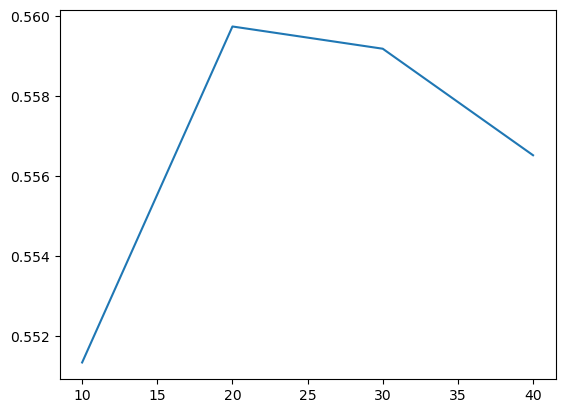

In [58]:
plt.plot(k_values, acc)

In [59]:
k = 20

In [60]:
final_model = KNeighborsRegressor(n_neighbors=k)

# Fit model
final_model.fit(x_train_knn, y_train_knn)

# Evaluate on training data
print("Training R2 Score:", final_model.score(x_train_knn, y_train_knn))  # Same as r2_score

# Predict on test data
y_pred2 = final_model.predict(x_test_knn)

# Evaluate on test data
print("Test R2 Score:", r2_score(y_test_knn, y_pred2))
print("Mean Squared Error (MSE):", mean_squared_error(y_test_knn, y_pred2))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test_knn, y_pred2)))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test_knn, y_pred2))

Training R2 Score: 0.5936778264696836
Test R2 Score: 0.5597357725035422
Mean Squared Error (MSE): 0.44443193516686275
Root Mean Squared Error (RMSE): 0.6666572846424637
Mean Absolute Error (MAE): 0.5045965100369987


# KNN Classifier

In [61]:
x_kn = final_df[['Price','Amenities Count','Accommodates','Beds','FAMILY_FRIENDLY', 'TV_AVAILABLE','Extra People']].to_numpy().reshape(-1,7)
y_kn = final_df['Room Type'].to_numpy().reshape(-1,1)

In [62]:
x_train_kn,x_test_kn,y_train_kn,y_test_kn = train_test_split(x_kn,y_kn,train_size = 0.7,random_state = 42)


In [63]:
k = int(len(x_train_kn)**0.5)
k

200

In [64]:
# finding optimum k value
acc_score= []
k_values = []
for i in np.arange(10,200,10):
    model_temp = KNeighborsClassifier(i).fit(x_train_kn,y_train_kn)
    y_pred_kn = model_temp.predict(x_test_kn)
    score_kn = accuracy_score(y_test_kn,y_pred_kn)
    acc_score.append(score_kn)
    k_values.append(i)

    print(f"k value: {i} - score: {score_kn}")

k value: 10 - score: 0.868081880212282
k value: 20 - score: 0.8690733072840731
k value: 30 - score: 0.869598180439727
k value: 40 - score: 0.8698314573977955
k value: 50 - score: 0.8697148189187613
k value: 60 - score: 0.8691899457631073
k value: 70 - score: 0.8684901148889018
k value: 80 - score: 0.8678486032542135
k value: 90 - score: 0.8669738146614568
k value: 100 - score: 0.8663323030267686
k value: 110 - score: 0.8662156645477342
k value: 120 - score: 0.8657491106315973
k value: 130 - score: 0.8652825567154604
k value: 140 - score: 0.8647576835598064
k value: 150 - score: 0.8639412142065668
k value: 160 - score: 0.8633580218113955
k value: 170 - score: 0.8633580218113955
k value: 180 - score: 0.8627748294162244
k value: 190 - score: 0.8628331486557416


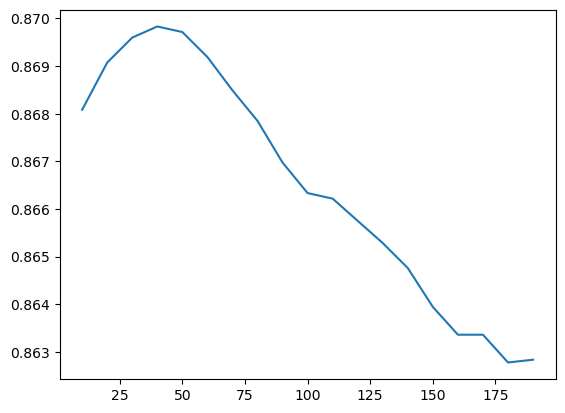

In [65]:
plt.plot(k_values,acc_score)

In [66]:
# Model
model_kn = KNeighborsClassifier(30).fit(x_train_kn,y_train_kn)
model_train_score = model_kn.score(x_train_kn,y_train_kn)
y_pred_kn = model_kn.predict(x_test_kn)
acc_score_kn = accuracy_score(y_test_kn,y_pred_kn)
f1_kn = f1_score(y_test_kn,y_pred_kn,average="weighted")
print(f"Training Performance : {model_train_score}")
print(f"Accuracy Score: {acc_score_kn}")
print(f"F1 Score : {f1_kn}")

Training Performance : 0.8758998200359928
Accuracy Score: 0.869598180439727
F1 Score : 0.8452379869244137
